# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import random
import cv2 as cv
import PIL
from PIL import Image
!pip install plotly
import plotly.express as px
from IPython import display


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = './drive/MyDrive/NFTProject/kaggle/input/cryptopunks/'
os.listdir(base_dir)

['txn_history-2021-10-07.jsonl', 'imgs']

In [ ]:
data_dir = './drive/MyDrive/NFTProject/kaggle/input/cryptopunks/txn_history-2021-10-07.jsonl'
image_dir = "./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs"
image_root = "./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs/imgs"

In [ ]:
df = pd.read_json(base_dir+'txn_history-2021-10-07.jsonl', lines=True)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


Sample 100 CryptoPunks


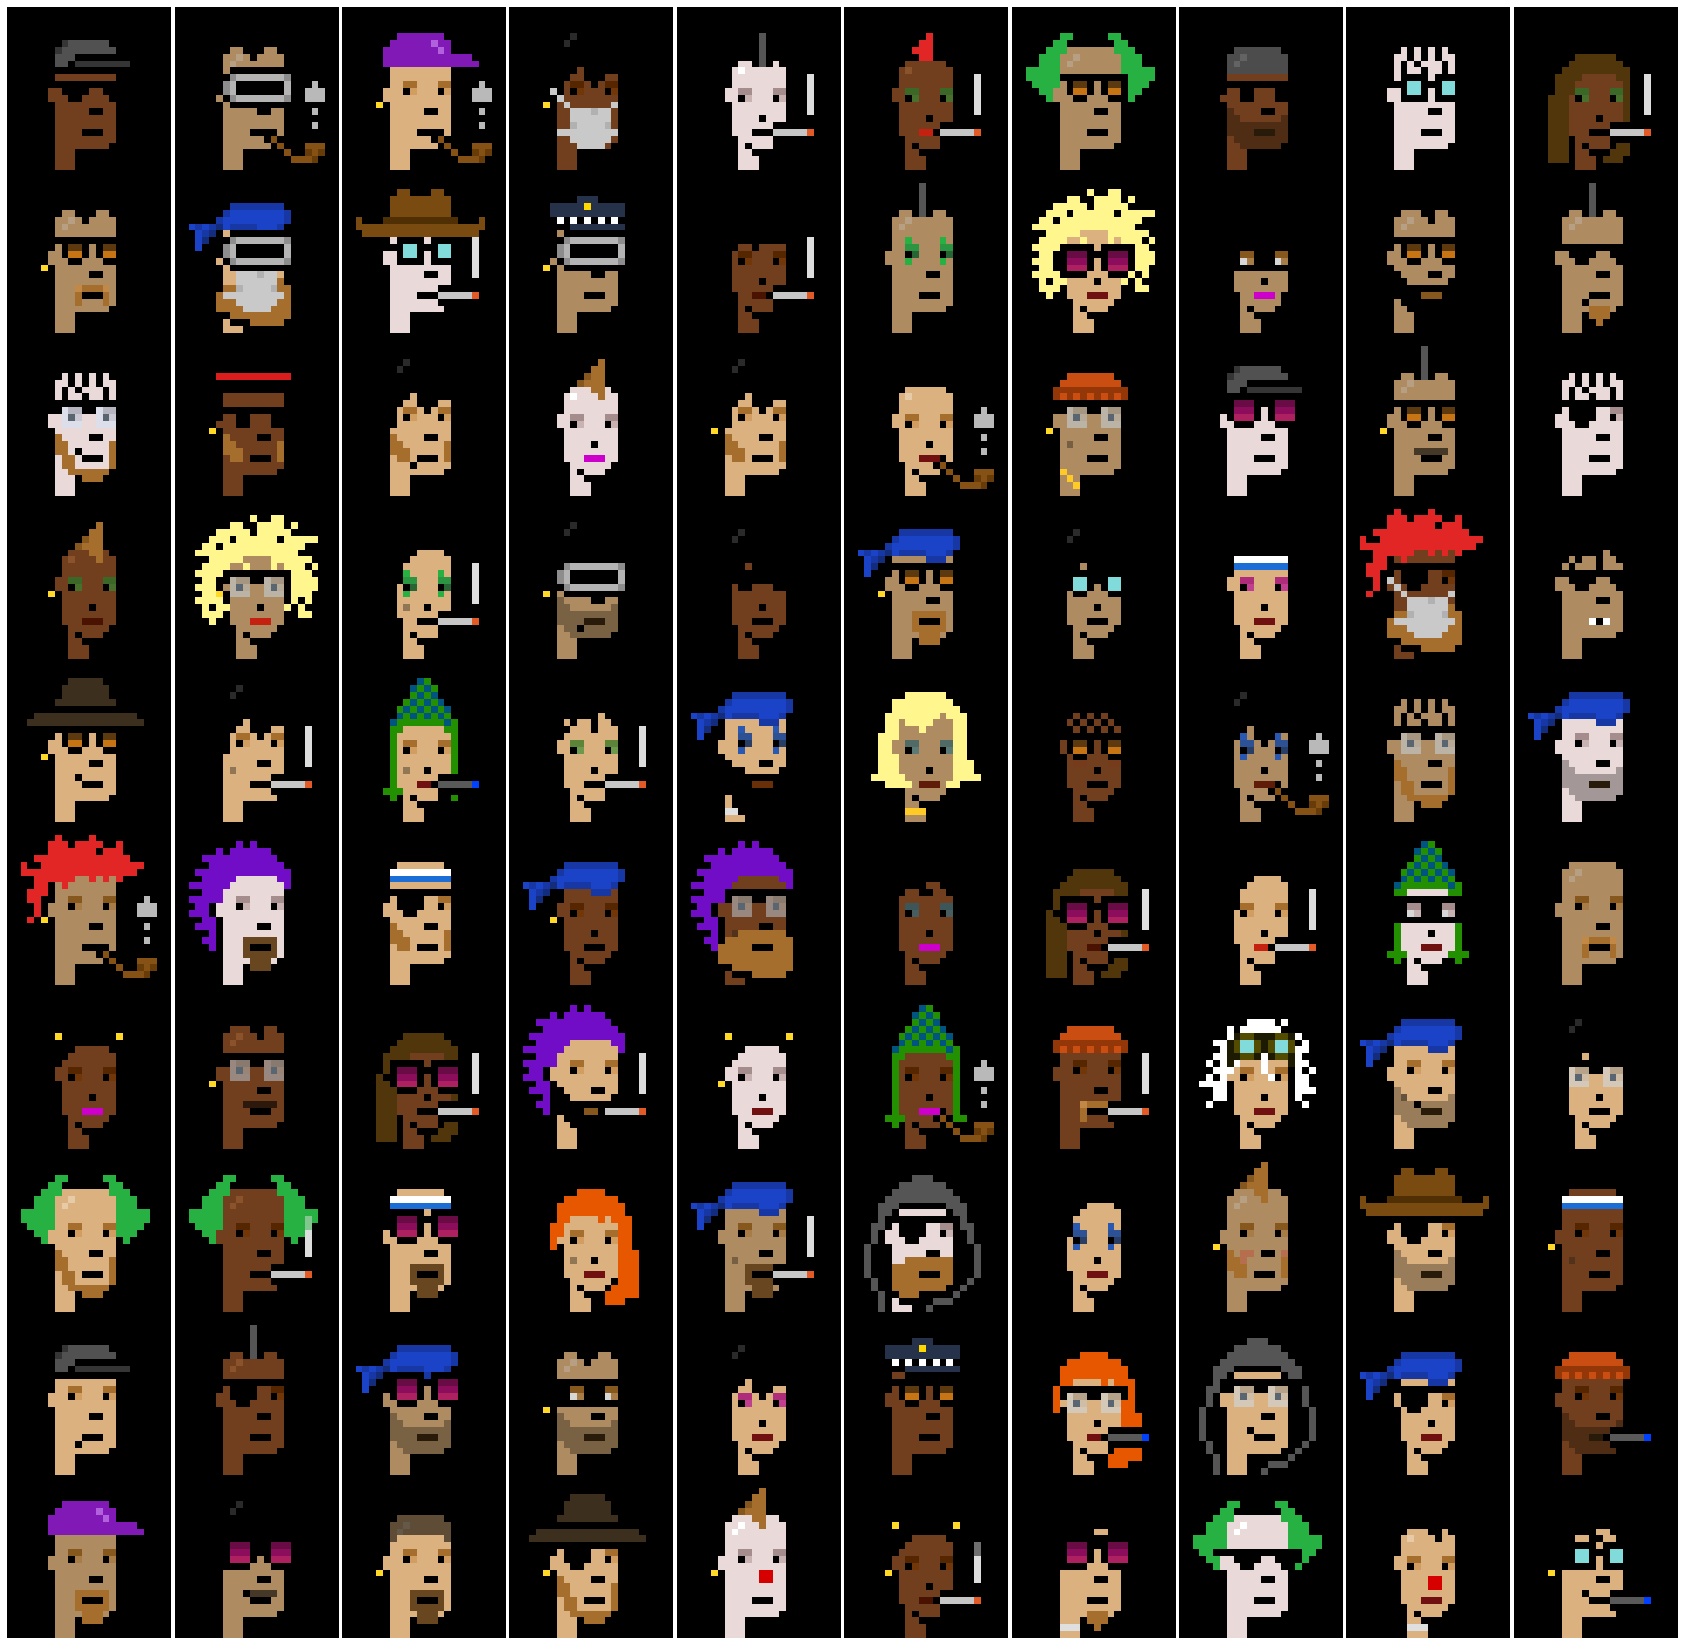

In [ ]:
#look at 100 samples

#define number of rows and cols
no_plots = 10*10

#define path
images = glob.glob("./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs/imgs/*.png")

plt.rcParams['figure.figsize'] = (30, 30)
plt.subplots_adjust(wspace=0, hspace=0)

print("Sample 100 CryptoPunks")
for idx,image in enumerate(images[:no_plots]):
    sample_img = cv.imread(image)
    plt.subplot(10, 10, idx+1)
    plt.axis('off')
    plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB)) #covert color space
plt.show()

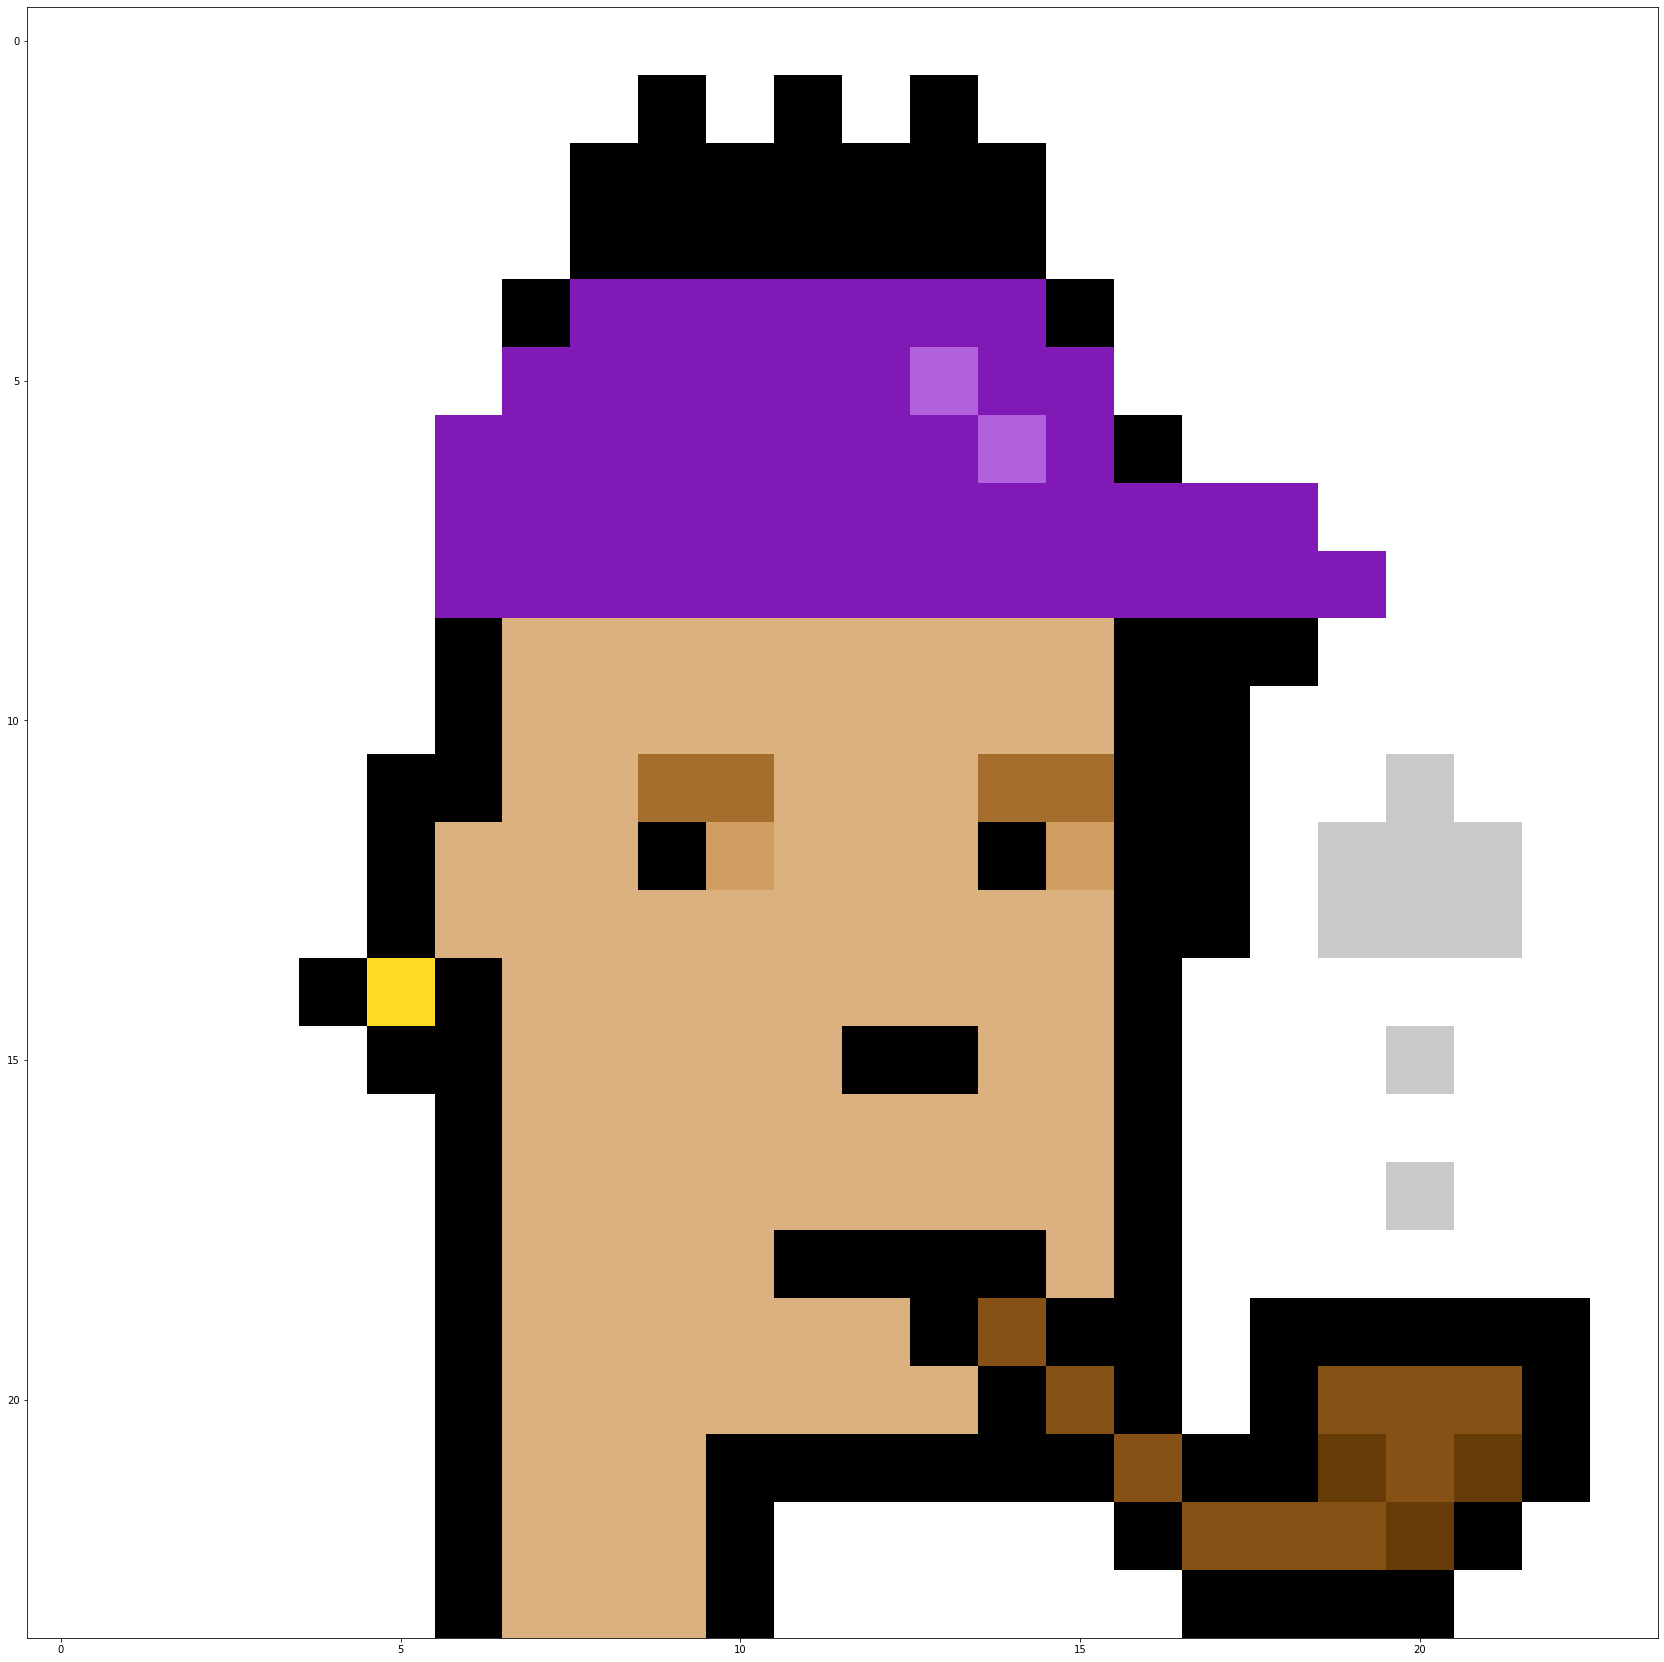

In [ ]:
punks = [img for img in glob.glob("./drive/MyDrive/NFTProject/input/cryptopunks/imgs/imgs/*.png")]

for punk in punks[0:3]:
    img = plt.imread(punk)
    plt.imshow(img)
plt.show()

In [ ]:
#check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  127542 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [ ]:
#create new dataframe with only useful columns
df = df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [ ]:
#value counts
df['txn_type'].unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered', 'Transfer', 'Claimed',
       'Offer Withdrawn', '(Wrap)', '(Unwrap)'], dtype=object)

In [ ]:
df['accessories'].explode().unique()

array(['Green Eye Shadow', 'Earring', 'Blonde Bob', 'Smile', 'Mohawk',
       'Wild Hair', 'Nerd Glasses', 'Pipe', 'Big Shades', 'Goat',
       'Purple Eye Shadow', 'Half Shaved', 'Do-rag', 'Wild White Hair',
       'Spots', 'Clown Eyes Blue', 'Messy Hair', 'Luxurious Beard',
       'Clown Nose', 'Police Cap', 'Big Beard', 'Blue Eye Shadow',
       'Black Lipstick', 'Clown Eyes Green', 'Straight Hair Dark',
       'Blonde Short', 'Purple Lipstick', 'Straight Hair Blonde',
       'Pilot Helmet', 'Hot Lipstick', 'Regular Shades', 'Stringy Hair',
       'Small Shades', 'Frown', 'Eye Mask', 'Muttonchops', 'Bandana',
       'Horned Rim Glasses', 'Crazy Hair', 'Classic Shades', 'Handlebars',
       'Mohawk Dark', 'Dark Hair', 'Peak Spike', 'Normal Beard Black',
       'Cap', 'VR', 'Frumpy Hair', 'Cigarette', 'Normal Beard',
       'Red Mohawk', 'Shaved Head', 'Chinstrap', 'Mole', 'Knitted Cap',
       'Fedora', 'Shadow Beard', 'Straight Hair', 'Hoodie', 'Eye Patch',
       'Headband', 'Cowbo

In [ ]:
len(df['accessories'].explode().unique())

88

In [ ]:
#exploded 'type' list to rows of the subset columns
df = df.explode("type")
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"


In [ ]:
#visualize
fig = px.bar(df[df.txn_type == 'Sold'].groupby("type").agg({"eth": "max"}).sort_values(by="eth").reset_index('type'),
             x="type", 
             y="eth", 
             color="type", 
             title="CryptoPunk Types vs. Price")
fig.show()

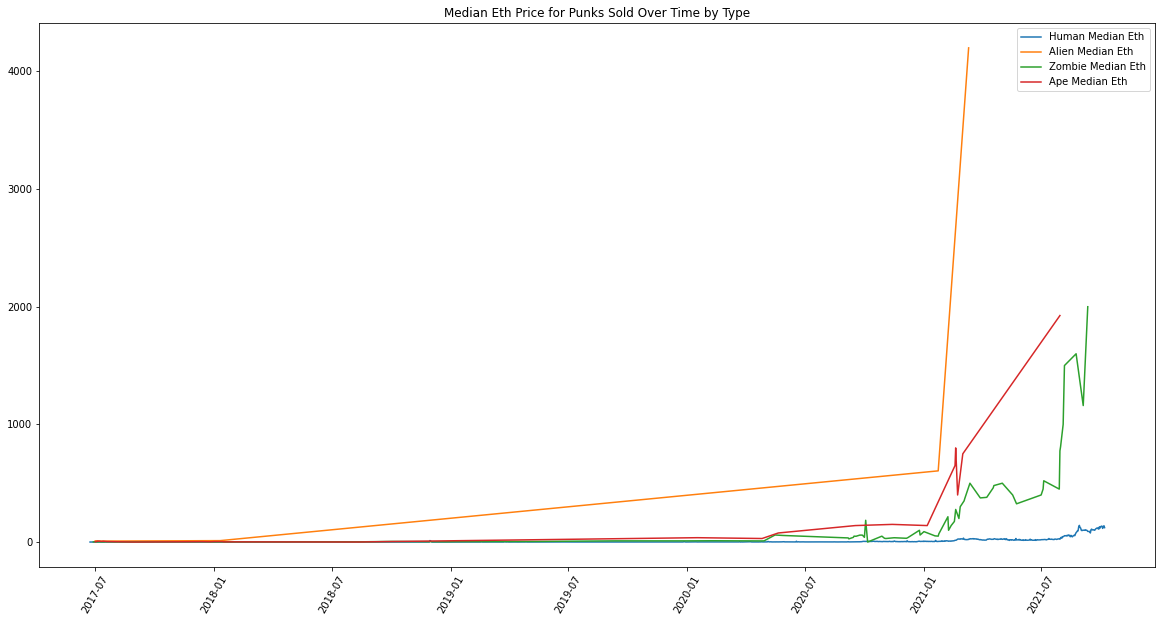

In [ ]:
#visualize human
human = df[(df.txn_type == 'Sold') & ((df.type == "Female") | (df.type == "Male")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize alien
alien = df[(df.txn_type == 'Sold') & ((df.type == "Alien")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize zombie
zombie = df[(df.txn_type == 'Sold') & ((df.type == "Zombie")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize ape
ape = df[(df.txn_type == 'Sold') & ((df.type == "Ape")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

plt.figure(figsize=(20,10))
plt.plot(human['date'], 
         human['eth']['median'], 
         label="Human Median Eth")

plt.plot(alien['date'], 
         alien['eth']['median'], 
         label="Alien Median Eth")

plt.plot(zombie['date'], 
         zombie['eth']['median'], 
         label="Zombie Median Eth")

plt.plot(ape['date'], 
         ape['eth']['median'], 
         label="Ape Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

In [ ]:
#get number of attributes
df['num_attributes'] = df.accessories.apply(lambda x: len(x))

In [ ]:
#compare number of attributes vs. price
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Female") | (df.type == "Male"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Human Punks")
fig.show()

In [ ]:
#visualize number of attributes vs price for alien
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Alien"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Alien Punks")
fig.show()

In [ ]:
#visualize number of attributes vs price for zombie
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Zombie"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Zombie Punks")
fig.show()

In [ ]:
#visualize number of attributes vs price for ape
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Ape"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Ape Punks")
fig.show()